In [5]:
import enum

from mode_util_base import read_field1D,read_maxcoords,rfcoord_xycomp_to_rfcoord_rfcomp
from mode_util_base import rcomp_fcomp_alone_zaxis_line,rcomp_fcomp_alone_xyplane_circle,rcomp_fcomp_alone_xyplane_radius
from mode_util_base import mode_wavenumber_mnp,main_mode_type
from modes_batch_v2 import result_stats,read_field3D
import numpy as np
import math
result_stats(result_dir=r"\\WIN-232\pillbox_result\210428")


MODE:1	Type:TM	Freq:501.05969	TEMCoff:601.541424	custType:TM
MODE:2	Type:TE	Freq:694.34861	TEMCoff:0.009895	custType:TE
MODE:3	Type:TM	Freq:765.51723	TEMCoff:261.260337	custType:TM
MODE:4	Type:TM	Freq:798.36047	TEMCoff:300.389619	custType:TM
MODE:5	Type:TE	Freq:860.18881	TEMCoff:0.010781	custType:TE
MODE:6	Type:HX	Freq:986.07485	TEMCoff:0.202074	custType:TE
MODE:7	Type:TE	Freq:1049.3828	TEMCoff:0.014428	custType:TE
MODE:8	Type:TM	Freq:1070.0409	TEMCoff:227.347839	custType:TM
MODE:9	Type:TM	Freq:1150.1502	TEMCoff:242.315867	custType:TM
MODE:10	Type:TM	Freq:1216.5369	TEMCoff:209.942773	custType:TM
MODE:11	Type:TE	Freq:1219.4226	TEMCoff:0.046883	custType:TE
MODE:12	Type:TE	Freq:1250.0101	TEMCoff:0.009287	custType:TE
MODE:13	Type:TE	Freq:1252.571	TEMCoff:0.006689	custType:TE
MODE:14	Type:TM	Freq:1261.3083	TEMCoff:59.306601	custType:TM
MODE:15	Type:TM	Freq:1287.5669	TEMCoff:211.102726	custType:TM
MODE:16	Type:TE	Freq:1320.9131	TEMCoff:0.027501	custType:TE
MODE:17	Type:TM	Freq:1329.3536	TEMC

100

In [4]:
arr,head=read_field3D(r"\\WIN-232\pillbox_result\210428\Mode_6_EField.txt")

Total lines:131074
EXPECTED SIZE:131074
['-229', '-229', '-129.501', '0', '0', '0', '0', '0', '0']
i=0,j=0,k=0,u= [0. 0. 0. 0. 0. 0.]
['-225.394', '-229', '-129.501', '0', '0', '0', '0', '0', '0']
i=1,j=0,k=0,u= [0. 0. 0. 0. 0. 0.]
['-221.787', '-229', '-129.501', '0', '0', '0', '0', '0', '0']
i=2,j=0,k=0,u= [0. 0. 0. 0. 0. 0.]
['-218.181', '-229', '-129.501', '0', '0', '0', '0', '0', '0']
i=3,j=0,k=0,u= [0. 0. 0. 0. 0. 0.]
['-214.575', '-229', '-129.501', '0', '0', '0', '0', '0', '0']
i=4,j=0,k=0,u= [0. 0. 0. 0. 0. 0.]


In [4]:
import matplotlib.pyplot as plt


In [5]:
resultdir=r"\\172.1.10.232\pillbox_modes"
modeindex=8
ex,erc,efc,hx,hrc,hfc=rcomp_fcomp_alone_xyplane_circle(r"\\172.1.10.232\pillbox_modes",1)
x_hz_lin,y_hz_lin=read_field1D(r"\\172.1.10.232\pillbox_modes\Mode_2_HZ_Z.txt")
x_e_cir,y_er_cir,y_ef_cir,x_h_cir,y_hr_cir,y_hf_cir=rcomp_fcomp_alone_xyplane_circle(resultdir,modeindex)
x_e_rad,y_er_rad,y_ef_rad,x_h_rad,y_hr_rad,y_hf_rad=rcomp_fcomp_alone_xyplane_radius(resultdir,modeindex)
x_e_lin,y_er_lin,y_ef_lin,x_h_lin,y_hr_lin,y_hf_lin=rcomp_fcomp_alone_zaxis_line(resultdir,modeindex)

y_ef_lin2=np.concatenate([-y_ef_lin,y_ef_lin])
x_e_lin2=np.concatenate([x_e_lin,x_e_lin+np.max(x_e_lin)])
y_hf_lin2=np.concatenate([-y_hf_lin,y_hf_lin])
x_h_lin2=np.concatenate([x_h_lin,x_h_lin+np.max(x_h_lin)])

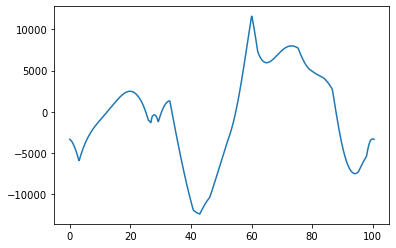

In [8]:
plt.plot(x_e_cir,y_er_cir)

In [6]:
def mode_type_full(resultdir,modeindex):
    mainmode=main_mode_type(resultdir,modeindex)
    x_e_cir,y_er_cir,y_ef_cir,x_h_cir,y_hr_cir,y_hf_cir=rcomp_fcomp_alone_xyplane_circle(resultdir,modeindex)
    x_e_rad,y_er_rad,y_ef_rad,x_h_rad,y_hr_rad,y_hf_rad=rcomp_fcomp_alone_xyplane_radius(resultdir,modeindex)
    x_e_lin,y_er_lin,y_ef_lin,x_h_lin,y_hr_lin,y_hf_lin=rcomp_fcomp_alone_zaxis_line(resultdir,modeindex)
    m_e,n_e,p_e=mode_wavenumber_mnp(x_e_cir,y_ef_cir,x_e_rad,y_ef_rad,x_e_lin,y_ef_lin)
    m_h,n_h,p_h=mode_wavenumber_mnp(x_h_cir,y_hf_cir,x_h_rad,y_hf_rad,x_h_lin,y_hf_lin)

    return mainmode,m_e,n_e,p_e,m_h,n_h,p_h

In [7]:
for i in range(1,10):
    print(mode_type_full(r"\\172.1.10.232\pillbox_modes",i))

('TM', 4.0, 8, 13.0, 0.0, 1, 0)
('TE', 1.0, 0, 1.0, 1.0, 0, 1.0)
('TM', 13.0, 12, 7.0, 0.0, 1, 1.0)
('TM', 14.0, 10, 0, 1.0, 1, 0)
('TE', 2.0, 1, 1.0, 2.0, 1, 1.0)
('HX', 0.0, 1, 1.0, 1.0, 1, 1.0)
('TE', 3.0, 2, 1.0, 3.0, 1, 1.0)
('TM', 4.0, 14, 7.0, 2.0, 2, 0)
('TM', 12.0, 14, 21.0, 0.0, 1, 0)


In [8]:
def mode_type_final(resultdir,modeindex):
    mainmode,m_e,n_e,p_e,m_h,n_h,p_h=mode_type_full(resultdir,modeindex)
    if mainmode=="TM":
        M=m_h
        N=n_h
        P=p_h
    elif mainmode=="TE":
        M=m_e
        N=n_e
        P=p_e
    else:
        M=-1
        N=-1
        P=-1
    return mainmode,M,N,P


In [16]:
for i in range(1,100):
    print(i,mode_type_final(r"\\172.1.10.232\pillbox_modes",i))

1 ('TM', 0.0, 1, 0)
2 ('TE', 1.0, 0, 1.0)
3 ('TM', 0.0, 1, 1.0)
4 ('TM', 1.0, 1, 0)
5 ('TE', 2.0, 1, 1.0)
6 ('HX', -1, -1, -1)
7 ('TE', 3.0, 2, 1.0)
8 ('TM', 2.0, 2, 0)
9 ('TM', 0.0, 1, 0)
10 ('TM', 2.0, 2, 1.0)
11 ('TE', 1.0, 0, 1.0)
12 ('TE', 4.0, 1, 1.0)
13 ('TE', 1.0, 1, 1.0)
14 ('TM', 0.0, 1, 0)
15 ('TM', 0.0, 1, 1.0)
16 ('TE', 2.0, 1, 1.0)
17 ('TM', 3.0, 2, 0)
18 ('TE', 0.0, 1, 1.0)
19 ('TM', 3.0, 2, 1.0)
20 ('TE', 3.0, 1, 1.0)
21 ('TE', 5.0, 1, 1.0)
22 ('TM', 1.0, 2, 0)
23 ('TE', 2.0, 2, 1.0)
24 ('TE', 0.0, 1, 1.0)
25 ('TM', 2.0, 2, 0)
26 ('TM', 4.0, 2, 0)
27 ('TE', 4.0, 0, 1.0)
28 ('TE', 1.0, 1, 1.0)
29 ('TM', 0.0, 2, 0)
30 ('TE', 6.0, 2, 1.0)
31 ('TM', 4.0, 1, 1.0)
32 ('TM', 2.0, 2, 0)
33 ('TM', 3.0, 1, 0)
34 ('TE', 3.0, 2, 1.0)
35 ('TE', 1.0, 0, 3.0)
36 ('TM', 0.0, 3, 0)
37 ('TM', 0.0, 1, 3.0)
38 ('TE', 2.0, 2, 0)
39 ('TM', 5.0, 2, 0)
40 ('TM', 2.0, 3, 1.0)
41 ('TE', 2.0, 0, 3.0)
42 ('HX', -1, -1, -1)
43 ('TE', 1.0, 2, 1.0)
44 ('TE', 7.0, 1, 1.0)
45 ('TM', 0.0, 2, 1.0)
46 ('H